<a href="https://colab.research.google.com/github/avncalst/drone_cnn/blob/master/customObjectDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources Used
- wget.download('https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py')
- Setup https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

In [ ]:
# Support for TF2 models was added after TF 2.3.
!pip install tf-nightly

     |████████████████████████████████| 403.2MB 42kB/s 
     |████████████████████████████████| 471kB 36.5MB/s 
     |████████████████████████████████| 12.3MB 256kB/s 
     |████████████████████████████████| 4.0MB 36.7MB/s 
     |████████████████████████████████| 4.0MB 35.6MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [ ]:
# create a symbolic link
!ln -s "drive/MyDrive/Colab Notebooks/Tensorflow" "./Tensorflow"
!dir

drive  sample_data  Tensorflow


In [ ]:
# delete symbolic link
!rm "./Tensorflow"

In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2397, done.
remote: Counting objects: 100% (2397/2397), done.
remote: Compressing objects: 100% (1996/1996), done.
remote: Total 2397 (delta 570), reused 1380 (delta 374), pack-reused 0
Receiving objects: 100% (2397/2397), 30.77 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install . 

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1616286 sha256=3714c6ddd057c1f186b72efe2ee9b55adfc8e63bb97ccdafd9c98fc8003d0646
  Stored in directory: /tmp/pip-ephem-wheel-cache-cov5hqam/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.1-cp36-none-any.whl size=43734 sha256=a0ca98facfc773f80152259d072de9123fe4a0143a956d42e061099c4eb02a1a
  Stored in directory: /root/.cache/pip/wheels/65/fe/90/20d6d6d97223d80d20cb390be636619c536edab5658c12bdba
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=c839a5815fbea3bf11a5e29f1eebad287d8ff9cb8496b0aa617d74f68eb7f3c4
  Stored in directory: /root/.cache/pip/wheels/fe/a7/05/23e3699975fc20f8a30e00ac1e515ab8c61168e982abe4ce70
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=ccf25da6dbf273dedb7f6d453d410c45ed354537fea93eb43e1755

ERROR: tf-nightly 2.5.0.dev20210201 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tf-nightly 2.5.0.dev20210201 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.27.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.1 which is incompatible.


# 0. Setup Paths + load modules

In [ ]:
WORKSPACE_PATH = 'Tensorflow/workspace'
SCRIPTS_PATH = 'Tensorflow/scripts'
APIMODEL_PATH = 'Tensorflow/models'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'
MODEL_PATH = WORKSPACE_PATH+'/models'
PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet/'
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

import cv2 # if imported !labelImg not working
import os
import time
import shutil
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Capture images from webcam

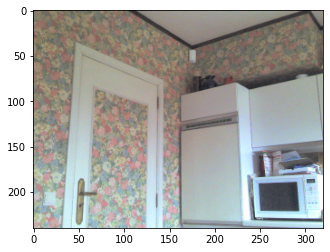

count%10: 0
pause: q
images saved: Tensorflow/workspace/images/collectedimages


In [ ]:
# imgFolder = 'Tensorflow/workspace/images/img_avc'
imgFolder = IMAGE_PATH + '/collectedimages'
# os.mkdir(imgFolder)
cap = cv2.VideoCapture(0)
width = 640  # WIDTH OF THE IMAGE
height = 480  # HEIGHT OF THE IMAGE
countStart = 100 # start numbering
count = countStart # start numbering
pause = False
# plt.figure(figsize=(4, 3)) # dimensionsin inch

while not pause:
    
    ret, myFrame = cap.read()
    img = cv2.resize(myFrame, (width, height))
    imag = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    filename = 'image'+ '_' +str(count) + '.jpg'
    if count > countStart+5:
        cv2.imwrite(os.path.join(imgFolder,filename),img)
        print('saving image:',count)
    imag = cv2.resize(imag,(320,240))
    time.sleep(1)
    clear_output(wait=True)
    plt.imshow(imag)
    plt.show()
    count += 1
    print('count%10:',count%20)
    if not (count%20):
        pause = True
        pause = input('Press "enter" to continue or "q" to quit')
        print('pause:',pause)

print('images saved:',imgFolder) 
cap.release()

# 2. Label images train & test folder
remark: if cv2 imported in jupyter notebook -> !labelImg not working. Restart Kernel.

Copy captures images files to train & test folder. Label images with labelImg. To generate xml-files with no label, press "verify image".

In [ ]:
source = IMAGE_PATH+'/collectedimages'
files = os.listdir(source)
num = len(files)
print('number of files:',num)
procent = 0.9
numpro = int(num*procent)
print('procent files:',numpro)
foldertrain = os.path.join(ANNOTATION_PATH, 'testTrain')
if not os.path.exists(foldertrain):
        os.makedirs(foldertrain)
foldertest = os.path.join(ANNOTATION_PATH, 'testTest')
if not os.path.exists(foldertest):
        os.makedirs(foldertest)

for idx, fil in enumerate(files):
    
    if idx < numpro:
        shutil.copy(source + '/' + fil, foldertrain)
        # print(fil) 
    else:
        shutil.copy(source + '/' + fil, foldertest)
        print(fil) 

print('files copied to:',numpro,foldertrain)
print('files copied to:',num-numpro,foldertest)


number of files: 18
procent files: 16
image_177.jpg
image_165.jpg
files copied to: 16 Tensorflow/workspace/annotations/testTrain
files copied to: 2 Tensorflow/workspace/annotations/testTest


In [ ]:
!labelImg

# 3. Create Label Map

In [ ]:
# labels = [{'name':'Cap', 'id':1}, {'name':'noCap', 'id':2}]
labels = [{'name':'avc', 'id':1}]

with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 4. Create TF records
use modified generate_tfrecord.py to incorporate background images

In [ ]:
!python3 {SCRIPTS_PATH + '/generate_tfrecord.py'} -x {ANNOTATION_PATH + '/train'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -c {ANNOTATION_PATH + '/train.csv'}  -o {ANNOTATION_PATH + '/train.record'}
!python3 {SCRIPTS_PATH + '/generate_tfrecord.py'} -x{ANNOTATION_PATH + '/test'} -l {ANNOTATION_PATH + '/label_map.pbtxt'}  -c {ANNOTATION_PATH + '/test.csv'} -o {ANNOTATION_PATH + '/test.record'}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the CSV file: Tensorflow/workspace/annotations/train.csv
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record
Successfully created the CSV file: Tensorflow/workspace/annotations/test.csv


# 5. Verification: plotting randomly selected images

In [ ]:
img_data = pd.read_csv(ANNOTATION_PATH + '/train.csv')
# img_data.loc[img_data['class'] == '-1', 'xmin'] = 0
# img_data.loc[img_data['class'] == '-1', 'ymin'] = 0
# img_data.loc[img_data['class'] == '-1', 'xmax'] = 0
# img_data.loc[img_data['class'] == '-1', 'ymax'] = 0
# img_data.loc[img_data['class'] == '-1', 'class'] = 0

img_data = img_data.replace('-1',0)
img_data = img_data.replace(-1,0)
img_data.head()
img_data.tail()



,filename,width,height,class,xmin,ymin,xmax,ymax
75,image_38.jpg,640,480,avc,89,191,178,309
76,image_64.jpg,640,480,avc,253,84,424,314
77,image_31.jpg,640,480,avc,189,169,288,295
78,image_160.jpg,640,480,0,0,0,0,0
79,image_21.jpg,640,480,avc,198,206,424,480


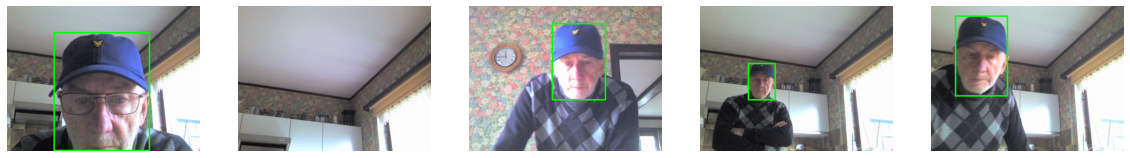

In [ ]:
# Create a Matplotlib figure
# img_directory = 'Tensorflow/workspace/images/img_avc/'
import random

plt.figure(figsize=(20,20));

# Generate a random sample of images each time the cell is run 
random_range = random.sample(range(1, 70), 5)
for iteration, i in enumerate(random_range):

    # Bounding box of each image
    x1, y1, x2, y2 = img_data.iloc[i][['xmin','ymin','xmax','ymax']].values;

    # read image to visualize
    imag = ANNOTATION_PATH+'/train/'+img_data.iloc[i]['filename']
    # print(imag)
    # print(i)
    image = cv2.imread(imag)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # print(imag)

    # Draw bounding boxes on the image
    cv2.rectangle(image, (int(x1),int(y1)),
          (int(x2),int(y2)),
                  (0,255,0),
                  3);
    
    # Clip the values to 0-1 and draw the sample of images
    # image = np.clip(img_list[i], 0, 1)
    plt.subplot(4, 5, iteration+1);
    plt.imshow(image);
    plt.axis('off');

# 6. Download TF Models Pretrained Models from Tensorflow Model Zoo

In [ ]:
#wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')
#!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRETRAINED_MODEL_PATH}
#!cd {PRETRAINED_MODEL_PATH} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

In [ ]:
!cd Tensorflow && git clone https://github.com/tensorflow/models

# 7. Copy Model Config to Training Folder

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

In [ ]:
!mkdir {'Tensorflow/workspace/models/'+CUSTOM_MODEL_NAME}
!cp {PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {MODEL_PATH+'/'+CUSTOM_MODEL_NAME}

# 8. Update Config For Transfer Learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
CONFIG_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/pipeline.config'

In [ ]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [ ]:
config

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = 1
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/train.record']
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 9. Train the model

In [ ]:
# print("""python {}/research/object_detection/model_main_tf2.py --model_dir={}/{} --pipeline_config_path={}/{}/pipeline.config --num_train_steps=5000""".format(APIMODEL_PATH, MODEL_PATH,CUSTOM_MODEL_NAME,MODEL_PATH,CUSTOM_MODEL_NAME))
!dir
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=5000

drive  models  sample_data  Tensorflow
2021-02-01 15:55:47.044920: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2021-02-01 15:55:47.044970: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-02-01 15:55:50.863318: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-01 15:55:50.917980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-01 15:55:50.918778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1770] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 

# 10. Load Train Model From Checkpoint

In [ ]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [ ]:
# Load pipeline config and build a detection model
output_checkpoint_dir = CHECKPOINT_PATH
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint

# exported_ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# ckpt_manager = tf.train.CheckpointManager(
#     exported_ckpt, output_checkpoint_dir, max_to_keep=None)
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt_manager = tf.train.CheckpointManager(
    ckpt, output_checkpoint_dir, max_to_keep=None)
# ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-6')).expect_partial()
ckpt.restore(ckpt_manager.latest_checkpoint).expect_partial()
ckpt_manager.save()
print('Checkpoint saved!')

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

Checkpoint saved!


# 11. Detect in Real-Time

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

In [ ]:
# Setup capture
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [ ]:
while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)


    # cv2.imshow('frame',  cv2.resize(image_np_with_detections, (800, 600)))

    # k = cv2.waitKey(30) & 0xff # press ESC to exit
    # if k == 27 or cv2.getWindowProperty('frame', 0)<0:
    #     break
    cv2.resize(image_np_with_detections, (600, 480))
    plt.imshow(image_np_with_detections)
# cv2.destroyAllWindows()
cap.release()

In [ ]:
!dir

# 12. Convert to tflite model

In [ ]:
%%bash
python3 Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py \
  --pipeline_config_path Tensorflow/workspace/models/outTest/pipeline.config \
  --trained_checkpoint_dir Tensorflow/workspace/models/outTest/checkpoint \
  --output_directory Tensorflow/tflite

In [ ]:
!tflite_convert --saved_model_dir=Tensorflow/tflite/saved_model --output_file=Tensorflow/tflite/model.tflite

# 13. Convert tflite model to edgetpu

In [ ]:
# def representative_data_gen():
    # for i in range(10):
    #   image = tf.random.uniform([1, 320, 320, 3])
    # #   print('image:',image)
    #   yield [image]

def representative_data_gen():
    imgFolder = ANNOTATION_PATH + '/train'
    for filename in os.listdir(imgFolder):
      img = cv2.imread(os.path.join(imgFolder,filename))
      img = cv2.resize(img,(320,320))
      img = np.expand_dims(img, axis=0)
      img = np.asarray(img, dtype=np.float32)
      img = img/127.5-1
      print(img.shape)
      yield [img]

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_model = converter.convert()
with open(save_path + 'convert_quant.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!edgetpu_compiler --show_operations {save_path + 'convert_quant.tflite'} -o Tensorflow/tflite/

# 14. Mount drive en download folder from Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r /content/file.zip /content/tflite

In [ ]:
from google.colab import files
files.download('file.zip')